/home/sorina/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


['20250509-220807', '20250509-222337', '20250509-223910', '20250509-225440', '20250509-231006', '20250509-234713', '20250510-112712']


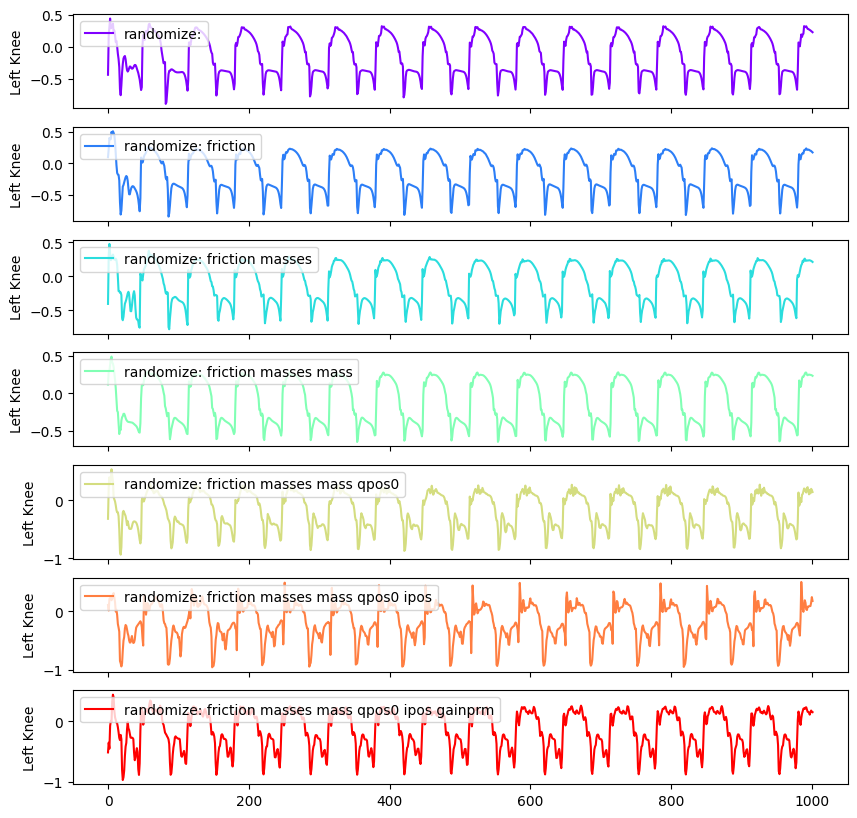

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import numpy as np

folder = '.'

# Read folders in the current directory, only folders, not files.
folders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]
# Sort them
folders.sort()
print(folders)

# Extract for each folder the domain randomization parameters and the rl_outputs.csv file
domain_randomization_params = []
label = []
dfs = []
for idx, folder in enumerate(folders):
    domain_randomization_file = os.path.join(folder, 'config_randomize.json')
    with open(domain_randomization_file, 'r') as f:
        domain_randomization_params.append(json.load(f))

    what_is_randomized = ['randomize:']
    for key, value in domain_randomization_params[idx].items():
        if value is True:
            # Split the key by '_' and take the last part.
            what_is_randomized.append(key.split('_')[-1])
    
    label.append(' '.join(what_is_randomized))
            
    path = os.path.join(folder, 'rl_outputs.csv')
    df = pd.read_csv(path)
    dfs.append(df)


# Plot the knees angles.
colors = plt.cm.rainbow(np.linspace(0, 1, len(dfs)))
fig, ax = plt.subplots(len(dfs), 1, figsize=(10, 10), sharex=True)
for idx, df in enumerate(dfs):
    ax[idx].plot(df['L_KFE'], label=label[idx], color=colors[idx])
    ax[idx].legend(loc='upper left')
    ax[idx].set_ylabel('Left Knee')
plt.show()


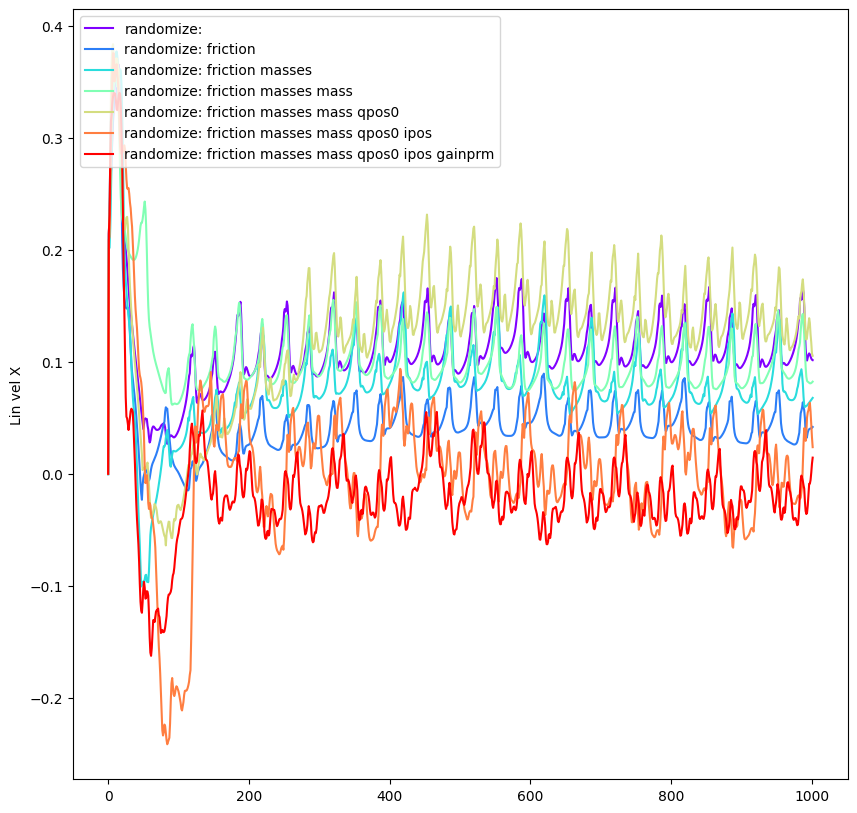

In [2]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(dfs)))
fig, ax = plt.subplots(1 , 1, figsize=(10, 10), sharex=True, sharey=True)
for idx, df in enumerate(dfs):
    ax.plot(df['lin_vel_x'], label=label[idx], color=colors[idx])

    ax.legend(loc='upper left')
    ax.set_ylabel('Lin vel X')
plt.show()
